In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Step 1: Load the dataset
data = pd.read_csv(r"/content/Mall_Customers.csv")

In [3]:
# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

Dataset Preview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:
# Step 2: Data Preprocessing
# Select the features for clustering
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]
#standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


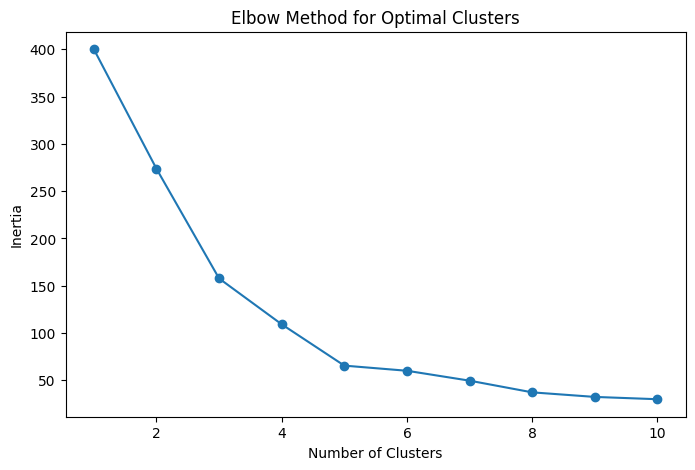

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Calculate inertia for a range of cluster numbers
k_range = range(1, 11)  # Example: considering clusters from 1 to 10
inertia = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # Fit KMeans to your scaled data
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')  # Changed marker to 'o'
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [10]:
#step 4 apply k-means clustering
#choose the optimal number of clusters(e.g., 5 based on the elbow plot)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

#add the clusters labels to the original dataset
data['cluster'] = kmeans.labels_

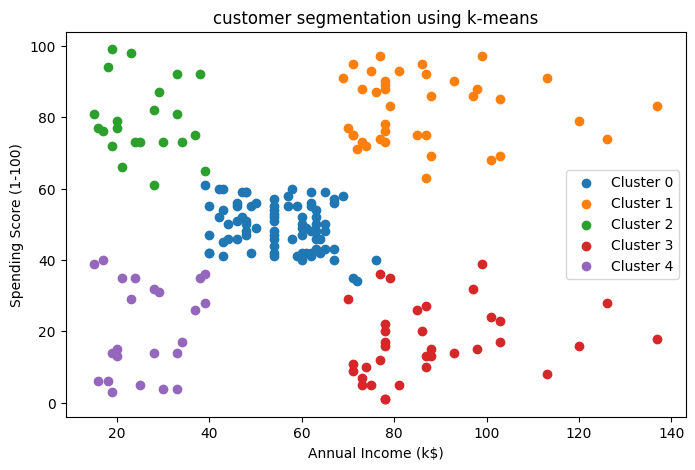

In [15]:
#step 5 visualize the clusters
plt.figure(figsize=(8, 5))
for cluster in range(5):
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster}')
plt.title('customer segmentation using k-means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()